In [1]:
import numpy
x = [0, 1, 2, 3, 4, 5]
y = [13, 43, -5, 8, 12, 28]

In [2]:
p = numpy.polynomial.Polynomial.fit(x, y, len(y)-1)
p.convert()

Polynomial([  13.        ,  227.58333333, -329.29166667,  162.91666667,
        -33.70833333,    2.5       ], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [3]:
xx = numpy.linspace(x[0], x[-1], 10000)
import matplotlib.pyplot as plt

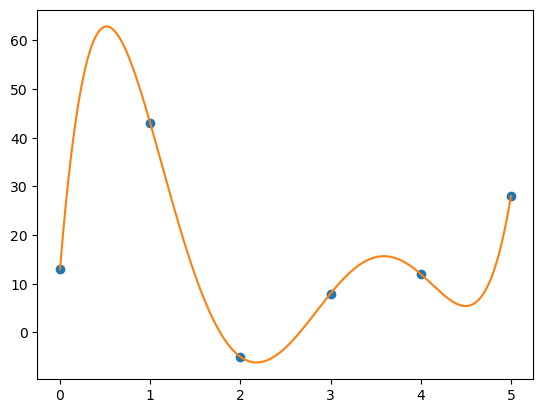

In [4]:
plt.plot(x, y, marker="o", lw=0)
plt.plot(xx, p(xx))
plt.show()

# Spline stopnia 1

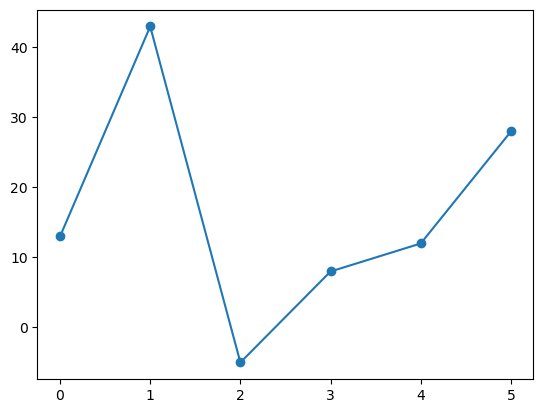

In [5]:
plt.plot(x, y, marker="o")

# Spline stopnia 3

In [6]:
from scipy.interpolate import CubicSpline

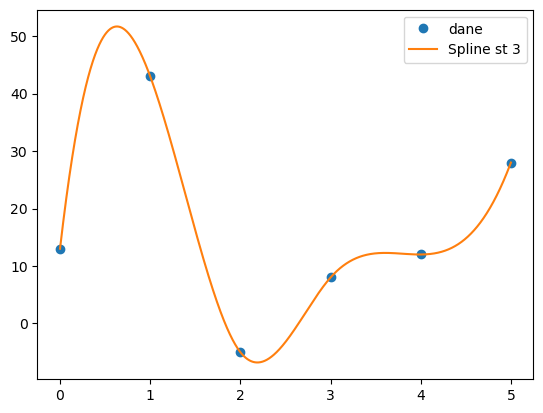

In [7]:
p3 = CubicSpline(x, y)
plt.plot(x, y, marker="o", lw=0, label="dane")
plt.plot(xx, p3(xx), label="Spline st 3")
plt.legend()

# Zadanie 13.1. 
W pliku `interpolacjaorazlznk3.csv` są zapisane dokładne wartości pewnej funkcji w kilku punktach. Wykonaj wykres tej funkcji następującymi sposobami:
- Rysując funkcję sklejaną stopnia 1 interpolującą te punkty.
- Rysując funkcję sklejaną stopnia 3 interpolującą te punkty.
- Znajdując wielomian intepolujący te punkty w sensie Lagrange’a. $\\$
Wykonaj też wspólny wykres, na którym znajdą się wszystkie powyższe możliwości oraz będą zaznaczone oryginalnie wczytane punkty.

In [8]:
x, y = numpy.loadtxt("pliczki/interpolacjaorazlznk3.csv", delimiter=",", skiprows=1).transpose()

### Spline stopnia 1

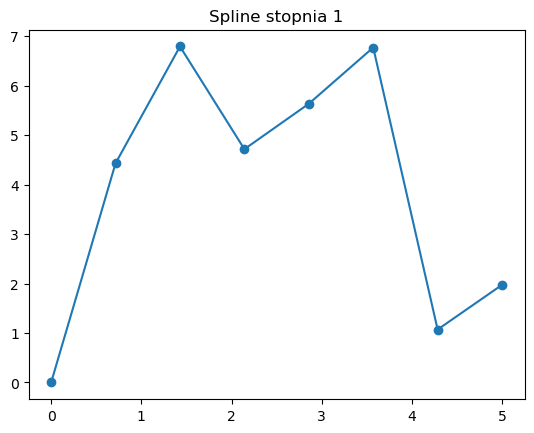

In [9]:
plt.plot(x, y, marker="o")
plt.title("Spline stopnia 1")
plt.show()

### Spline stopnia 3

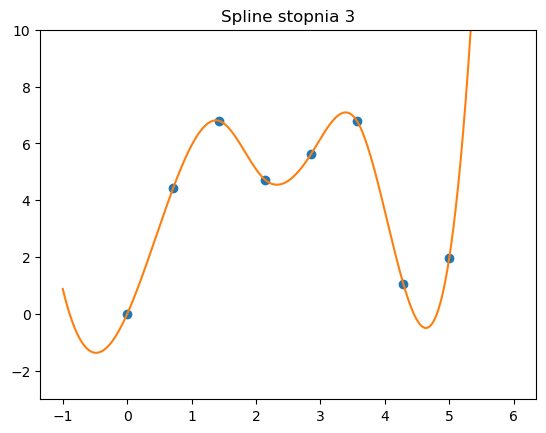

In [10]:
s3 = CubicSpline(x, y)
xx = numpy.linspace(x[0]-1, x[-1]+1, 1000)
plt.plot(x, y, marker="o", lw=0)
plt.plot(xx, s3(xx))
plt.ylim((-3, 10))
plt.title("Spline stopnia 3")
plt.show()

### interpolacja Lagrange

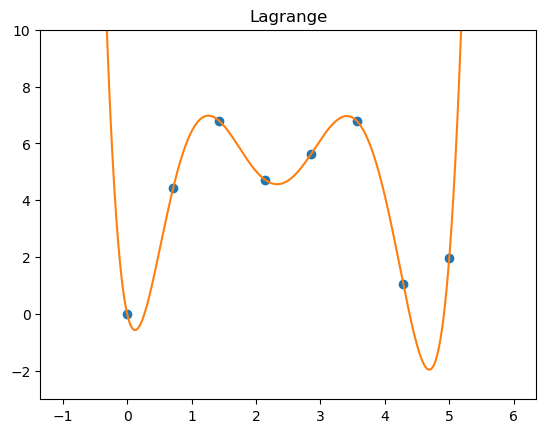

In [11]:
lagrange = numpy.polynomial.Polynomial.fit(x, y, len(y)-1)
plt.plot(x, y, marker="o", lw=0)
plt.ylim((-3, 10))
plt.plot(xx, lagrange(xx))
plt.title("Lagrange")
plt.show()

### Wszystko

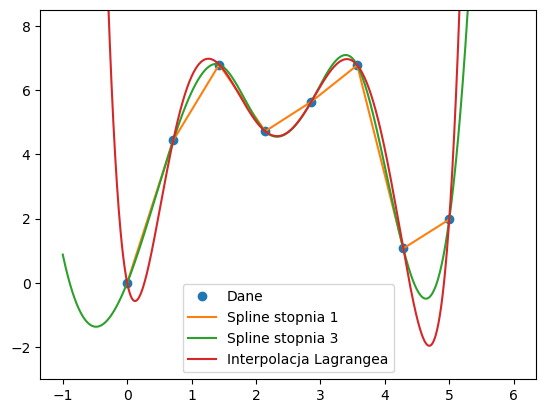

In [12]:
plt.plot(x, y, marker="o", lw=0, label="Dane")
plt.plot(x, y, label="Spline stopnia 1")
plt.plot(xx, s3(xx), label="Spline stopnia 3")
plt.plot(xx, lagrange(xx), label="Interpolacja Lagrangea")
plt.legend()
plt.ylim((-3, 8.5))
plt.show()

# Zadanie 13.2
Znajdź wielomian interpolujący funkcję cos w węzłach równoodległych na przedziale $[−5 \pi, 5 \pi]$. Porównaj go na wykresie z funkcją $cos$. Narysuj kilka przypadków dla różnej ilości węzłów.
Ile węzłów należy wybrać, aby róznica między funkcją $cos$ a wielomianem była na poziomie 0.1 lub mniejszym?

In [13]:
space = lambda n: numpy.linspace(-5*numpy.pi, 5*numpy.pi, n)
roznica = lambda p: max([abs(numpy.cos(i) - p(i)) for i in space(10000)])
inter = lambda n: numpy.polynomial.Polynomial.fit(space(n), numpy.cos(space(n)), n-1)
p10 = inter(10)
p100 = inter(100)
p1000 = inter(1000)
# p10000 = inter(10_000)

/usr/lib/python3/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


### Różnice

In [14]:
# print("10", roznica(p10, 10))
# print("100", roznica(p100, 100))
# print("1000", roznica(p1000, 1000))

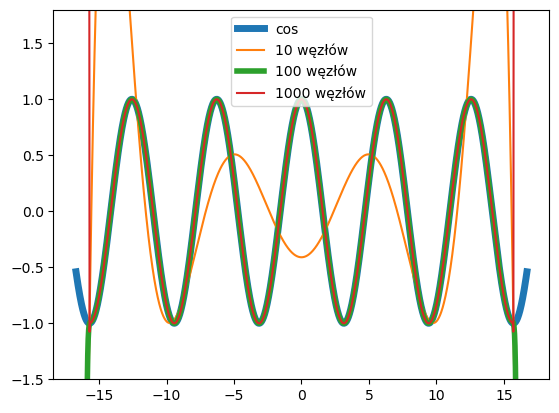

In [15]:
x = numpy.linspace(-5*numpy.pi -1, 5*numpy.pi+1, 2000)
plt.plot(x, numpy.cos(x), label="cos", lw=5)
plt.plot(x, p10(x), label="10 węzłów")
plt.plot(x, p100(x), label="100 węzłów", lw=4)
plt.plot(x, p1000(x), label="1000 węzłów")
plt.ylim([-1.5, 1.8])
plt.legend()
plt.show()

# Zadanie 13.3
Powtórz zadanie `13.2` stosując węzły Czebyszewa:
$$ x_j := \frac{b-a}{2} cos(\frac{2j+1}{2n}\pi) + \frac{a+b}{2} $$
$$ j \in {0, ..., n-1} $$

In [16]:
a = -5*numpy.pi
b = 5*numpy.pi
czebyszew_j = lambda j, n:  (b-a)/2 * numpy.cos((2*j+1)/(2*n)*numpy.pi) + (a+b)/2
caly_czebyszew = lambda n: [czebyszew_j(j, n) for j in range(n)]
caly_czebyszew(10)

[15.514572174249892,
 13.995897753453765,
 11.107207345395915,
 7.1312660939065955,
 2.457266830693194,
 -2.4572668306931957,
 -7.131266093906594,
 -11.107207345395913,
 -13.995897753453763,
 -15.51457217424989]

In [17]:
inter_czyb = lambda n: numpy.polynomial.Polynomial.fit(caly_czebyszew(n), numpy.cos(caly_czebyszew(n)), n-1)
czyb10 = inter_czyb(10)
czyb100 = inter_czyb(100)
czyb1000 = inter_czyb(1000)

In [18]:
roznica = lambda p: max([abs(numpy.cos(i) - p(i)) for i in numpy.linspace(a, b, 1000)])
print("10", roznica(czyb10))
print("100", roznica(czyb100))
print("1000", roznica(czyb1000))

10 2.2610685738224863
100 4.081385951426597e-09
1000 6.285444163756093e-07


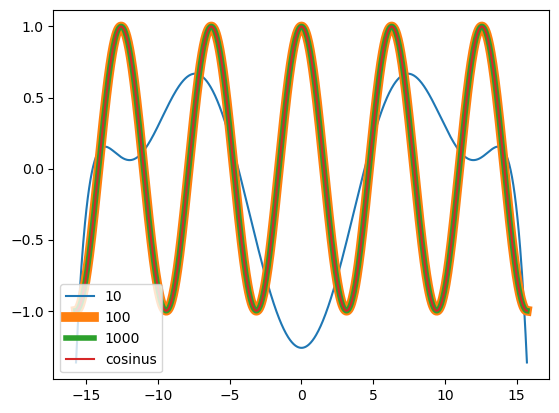

In [19]:
space = numpy.linspace(a, b, 1000)
plt.plot(space, czyb10(space), label="10")
plt.plot(space, czyb100(space), label="100", lw=7)
plt.plot(space, czyb1000(space), label="1000", lw=4)
plt.plot(space, numpy.cos(space), label="cosinus")
plt.legend()
plt.show()

# Zadanie 13.4
Znajdź wielomian interpolacyjny Lagrange’a dla funkcji
$$ f(x) := \frac{1}{1+x^2}$$
wykonanej na węzłach równoodległych i na węzłach Czebyszewa na przedziale $[−5, 5]$. Czy
w obu przypadkach jest tak, że im więcej węzłów weźmiemy, tym lepiej wielomian przybliża
funkcję $f$?

In [20]:
f = lambda x: 1/(1+x**2)
rownodlegle = lambda n: numpy.linspace(-5, 5, n)
a, b = -5, 5
czebyszew_j = lambda j, n:  (b-a)/2 * numpy.cos((2*j+1)/(2*n)*numpy.pi) + (a+b)/2
caly_czebyszew = lambda n: numpy.array([czebyszew_j(j, n) for j in range(n)])

In [21]:
inter = lambda space: numpy.polynomial.Polynomial.fit(space, f(space), len(space)-1)
roznica = lambda p: max([abs(p(i) - f(i)) for i in numpy.linspace(a, b, 5000)])

In [30]:
inter_rownoodlegle = {n: inter(rownodlegle(n)) for n in range(5, 100, 5)}
for i in inter_rownoodlegle:
    print(f"n={i} {roznica(inter_rownoodlegle[i])}")

n=5 0.43835714127670233
n=10 0.3002971950540374
n=15 7.194794030546079
n=20 8.57905478241876
n=25 257.21283484613866
n=30 333.94483410049673
n=35 1197.2702440071757
n=40 551.9740134995324
n=45 632.5934875374035
n=50 509.2620772471039
n=55 281.2845716979609
n=60 290.13686259313755
n=65 451.91936746742755
n=70 232.92444598099115
n=75 182.92726246642655
n=80 221.0170148969539
n=85 185.2462167071983
n=90 231.16425352137412
n=95 201.43005415303887


#### Test czy później interpolacja się poprawia - nie

In [25]:
# inter_rownoodlegle = {n: inter(rownodlegle(n)) for n in range(200, 500, 5)}
# for i in inter_rownoodlegle:
#     print(f"n={i} {roznica(inter_rownoodlegle[i])}")

n=200 102.8318449134158
n=205 102.27519646898679
n=210 136.8172836021569
n=215 136.0191081112635
n=220 122.03210182377876
n=225 121.00187770749636
n=230 108.93082534452131
n=235 108.50582558212271
n=240 98.40510055082119
n=245 98.56395330651593
n=250 132.23974628850164
n=255 131.76774624435677
n=260 120.95047438460249
n=265 120.8822409429015
n=270 111.33246247082896
n=275 111.27815231152762
n=280 103.03073027273543
n=285 103.00376904830964
n=290 95.42088856054926
n=295 95.55348574247081
n=300 127.12474243015016
n=305 126.75435415702061
n=310 118.22577169168818
n=315 119.05228648840277
n=320 111.18411361407378
n=325 112.28141417087626
n=330 104.99746801985611
n=335 106.01439983616807
n=340 99.5708890099256
n=345 100.07232301368047
n=350 94.46398662168423
n=355 95.07146035665436
n=360 125.9860111228686
n=365 126.36124807688486
n=370 118.80738180067122
n=375 119.75481524446113
n=380 113.43803392360546
n=385 114.31864800176224
n=390 107.99017548164446
n=395 109.0442309829213
n=400 103.2066

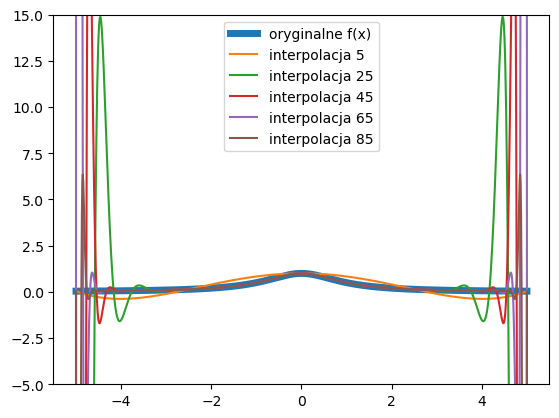

In [34]:
space = numpy.linspace(a, b, 1000)
plt.plot(space, f(space), label="oryginalne f(x)", lw=5)
for i in range(5, 90, 20):
    plt.plot(space, inter_rownoodlegle[i](space), label=f"interpolacja {i}")
plt.legend()
plt.ylim([-5, 15])
plt.show()

In [ ]:
inter_czybyszew = {n: inter(caly_czebyszew(n)) for n in range(5, 100, 5)}
for i in inter_czybyszew:
    print(f"n={i} {roznica(inter_czybyszew[i])}")

In [ ]:
space = numpy.linspace(a-3, b+3, 1000)
plt.plot(space, f(space), label="oryginalne f(x)", lw=5)
for i in range(5, 50, 20):
    plt.plot(space, inter_czybyszew[i](space), label=f"interpolacja {i}")
plt.legend()
plt.ylim([-5, 15])
plt.show()

# Zadanie 13.6
Powtórz zadanie `13.5` stosując interpolację funkcjami sklejanymi rzędu 3 w
węzłach równoodległych.

In [ ]:
f = lambda x: 1/(1+x**2)
rownodlegle = lambda n: numpy.linspace(-5, 5, n)
a, b = -5, 5
roznica = lambda p: max([abs(p(i) - f(i)) for i in numpy.linspace(a, b, 5000)])

In [ ]:
from scipy.interpolate import CubicSpline
spline3 = lambda space: CubicSpline(space, f(space))
spliny = {n: spline3(rownodlegle(n)) for n in range(5, 100, 5)}
for n in spliny:
    print(f"n={n} {roznica(spliny[n])}")

In [ ]:
space = numpy.linspace(a-1, b+1, 1000)
plt.plot(space, f(space), label="f(x)", lw=3)
for i in range(5, 100, 20):
    plt.plot(space, spliny[i](space), label=f"spline n={n}")
plt.legend()
plt.show()